<a href="https://colab.research.google.com/github/CherryProgger/fashionMnistModel/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
train_X[10110]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  73, 108,  93, 101,
         75,  99, 105,  88,  91,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 217, 199, 208,
        209, 203, 211, 189, 181, 105,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6, 193, 173, 155, 165,
        190, 179, 171, 171, 171, 140,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  36, 210, 168, 164, 173,
        193, 175, 160, 168, 172, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72, 206, 160, 168, 183,
        174, 171, 173, 165, 160, 175,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  93, 204, 148, 154, 165,
        207, 212, 179, 175, 165, 188,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 190, 138, 140, 168,
        166, 180, 199, 164, 148, 169,  83,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 123, 177, 131, 121, 177,
        109, 142, 221, 148, 119, 163,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  88, 178, 130, 116, 168,
        124, 151, 222, 134, 106, 139,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 185, 122, 113, 178,
        108, 116, 230, 133, 114, 140,  29,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2, 185, 138, 112, 185,
         96,  80, 230, 132, 113, 134,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 149, 106, 178,
         76,  50, 239, 127, 129, 123,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 167, 107, 182,
         59,  41, 241, 123, 141, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  93, 186, 109, 182,
         59,  37, 241, 120, 145,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 192, 115, 181,
         69,  38, 244, 118, 150,  64,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 179, 128, 186,
         71,  42, 242, 116, 150,  43,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 162, 143, 184,
         94,  53, 246, 130, 154,  27,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 160, 193,
         89,  23, 254, 143, 144,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 164, 178, 201,
         36,   0, 244, 173, 169,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 189, 213,
         21,   0, 218, 193, 166,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 188, 211,
         18,   0, 194, 200, 173,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 179, 191, 212,
         22,   0, 189, 202, 180,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 192, 185,
         32,   0, 191, 205, 178,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 194, 186,
         32,   0, 182, 207, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_Y[10110]

1

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
#находим уникальные лейблы

labels_unique = np.unique(train_Y)
num_classes = len(labels_unique)
print('Total number of classes : ', num_classes)
print('Unique labels : ', labels_unique)



Total number of classes :  10
Unique labels :  [0 1 2 3 4 5 6 7 8 9]


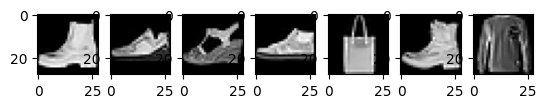

In [ ]:
#Вывод 7 рандомных изображений

import random

random_images = 7
img_indx = [random.randint(0, len(train_X)) for i in range(random_images)]
fig, axs = plt.subplots(1, random_images)

for ax, im in zip(axs, img_indx):
  ax.imshow(train_X[im], cmap='gray')

In [ ]:
#Нормализация данных (от 0 до 1)

train_X = train_X / 255.0
test_X = test_X / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
CNNmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

CNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizers = ['adam', 'SGD', 'RMSprop']

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1360 - accuracy: 0.9487
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1230 - accuracy: 0.9543
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1119 - accuracy: 0.9574
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1036 - accuracy: 0.9615
Epoch 5/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0945 - accuracy: 0.9635


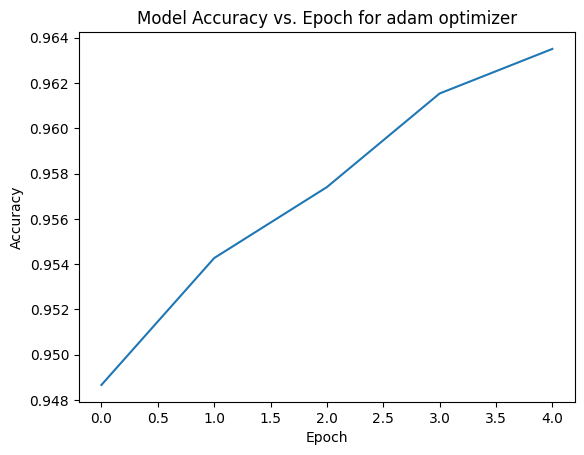

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0614 - accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0541 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0508 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0491 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0474 - accuracy: 0.9836


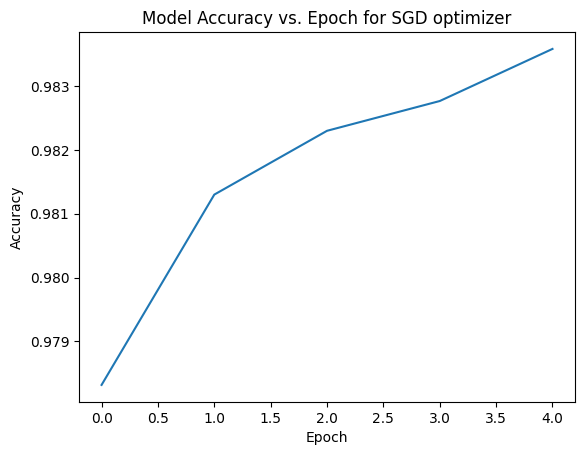

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0786 - accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0737 - accuracy: 0.9730
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0698 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0669 - accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0642 - accuracy: 0.9762


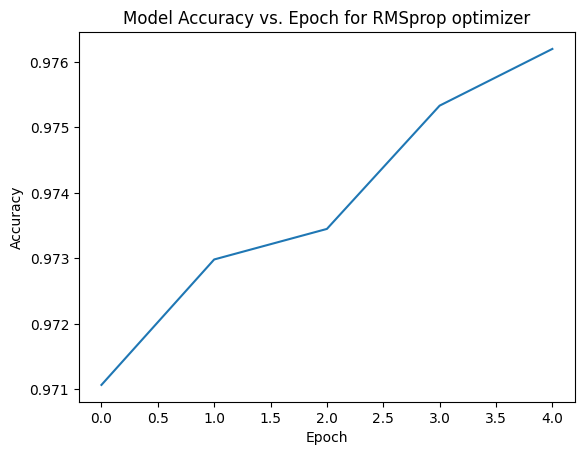

In [ ]:
for i in range(len(optimizers)):
  CNNmodel.compile(optimizer = optimizers[i],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


  train_X_reshaped = train_X.reshape(-1, 28, 28, 1)
  history = CNNmodel.fit(train_X, train_Y, epochs=5)

  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy vs. Epoch for ' + optimizers[i] + ' optimizer')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

  #print('\nTest accuracy for ' + optimizers[i] + ' optimizer:', test_acc)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4932 - accuracy: 0.8267
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3733 - accuracy: 0.8659
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3344 - accuracy: 0.8792
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8852
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8921
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8964
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704 - accuracy: 0.8997
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2592 - accuracy: 0.9027
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2494 - accuracy: 0.9067
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

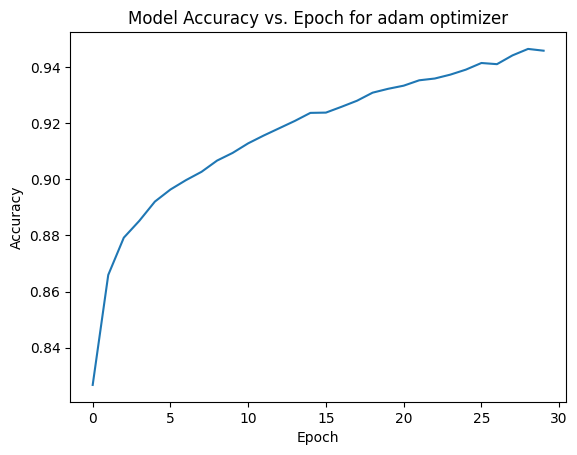

313/313 - 1s - loss: 0.4002 - accuracy: 0.8831 - 645ms/epoch - 2ms/step
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1085 - accuracy: 0.9608
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9632
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9646
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0983 - accuracy: 0.9644
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9653
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0967 - accuracy: 0.9656
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0958 - accuracy: 0.9654
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0952 - accuracy: 0.9664
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0947 - accuracy: 0.9666
Epoch 10/3

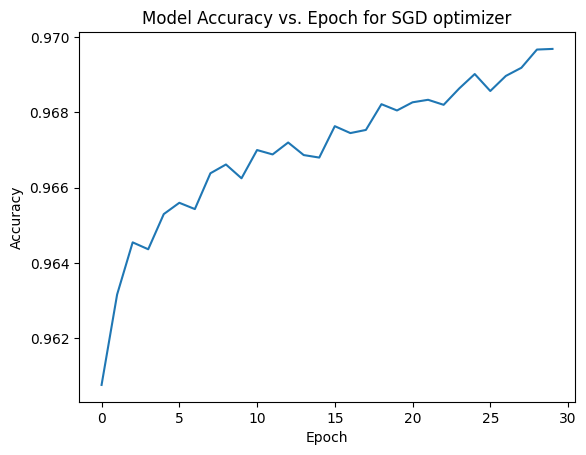

313/313 - 1s - loss: 0.4148 - accuracy: 0.8960 - 649ms/epoch - 2ms/step
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1332 - accuracy: 0.9510
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1338 - accuracy: 0.9511
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1343 - accuracy: 0.9517
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9518
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1328 - accuracy: 0.9530
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9522
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1297 - accuracy: 0.9544
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1295 - accuracy: 0.9542
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1284 - accuracy: 0.9541
Epoch 10/3

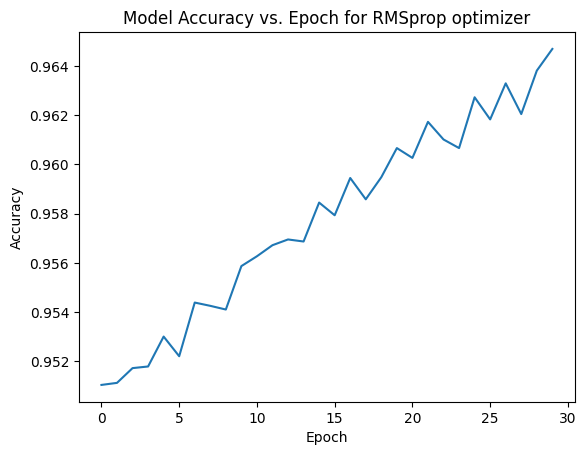

313/313 - 1s - loss: 0.7746 - accuracy: 0.8830 - 605ms/epoch - 2ms/step


In [ ]:
for i in range(len(optimizers)):
  model.compile(optimizer = optimizers[i],
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

  history = model.fit(train_X, train_Y, epochs=30)

  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy vs. Epoch for ' + optimizers[i] + ' optimizer')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

  test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

  #print('\nTest accuracy for ' + optimizers[i] + ' optimizer:', test_acc)

In [ ]:
########################################################################################################################################################

#Для более точных значений напишем модель CNN типа

In [ ]:
CNNmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #доп значение, тк его требуют данные ф-ии, оно в целом не испоьзуется
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

CNNmodel.summary()

In [ ]:
CNNmodel.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
train_X_reshaped = train_X.reshape(-1, 28, 28, 1)
CNNmodel.fit(train_X_reshaped, train_Y, epochs=5)

In [ ]:
test_X_reshaped = np.expand_dims(test_X, axis=-1)
CNNmodel.evaluate(test_X_reshaped, test_Y)

313/313 [==============================] - 3s 10ms/step - loss: 0.2621 - accuracy: 0.9068


[0.2621251046657562, 0.9067999720573425]

In [ ]:
#для наглядности запишем предсказания модели в массив и на графиках приведем иллюстрацию того, где модель оиблась
CNNpredictions = CNNmodel.predict(test_X)

313/313 [==============================] - 2s 7ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  label_color = 'green' if predicted_label == true_label else 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=label_color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="lightgray")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

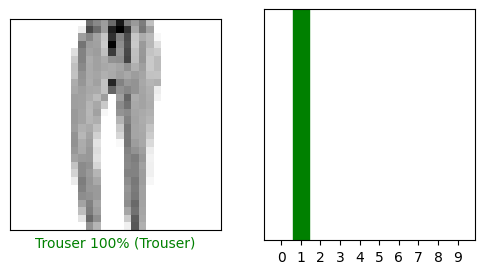

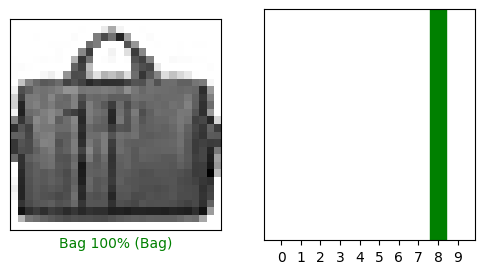

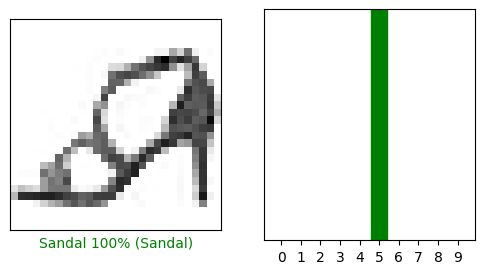

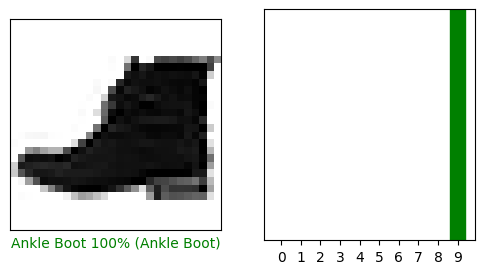

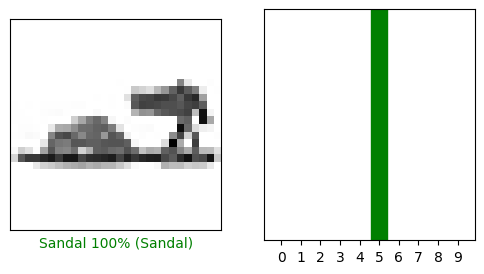

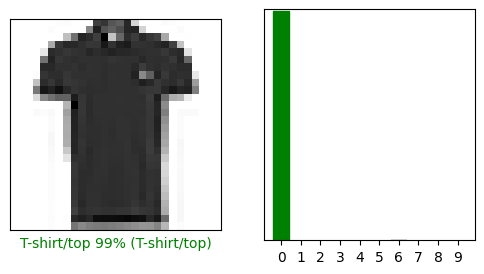

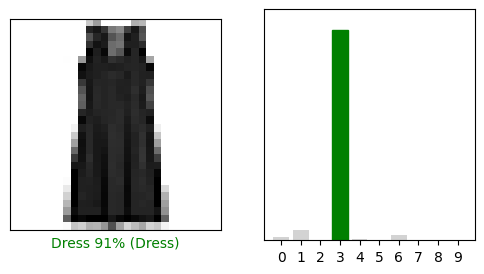

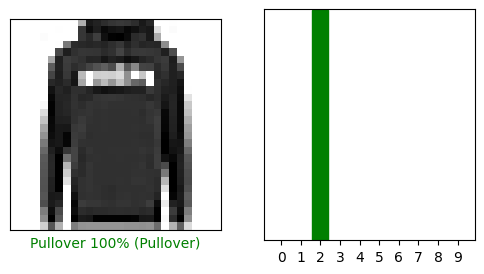

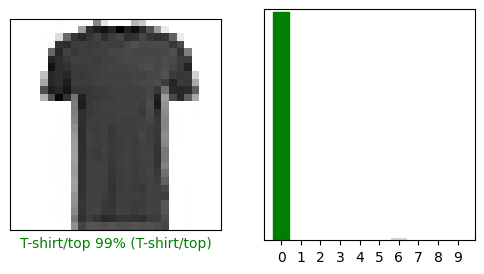

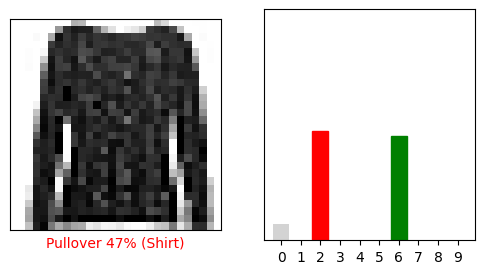

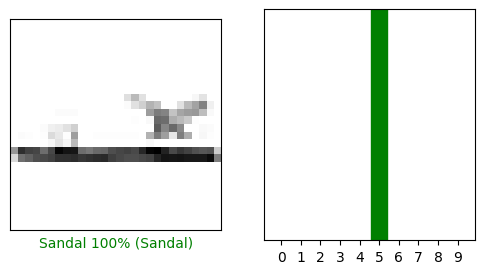

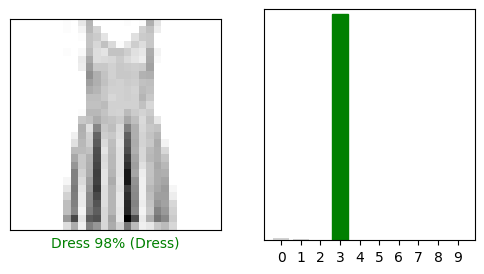

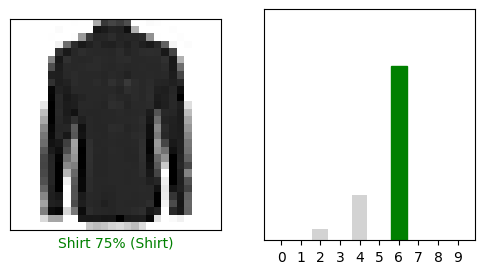

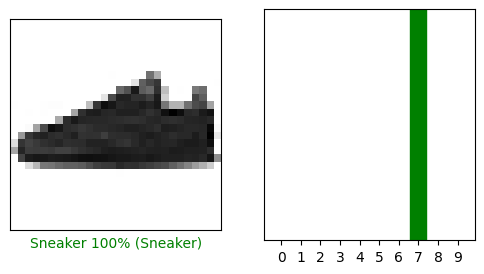

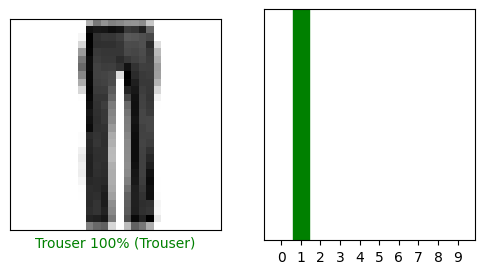

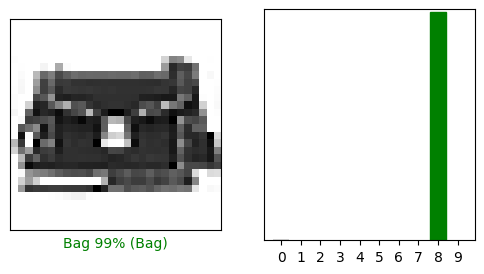

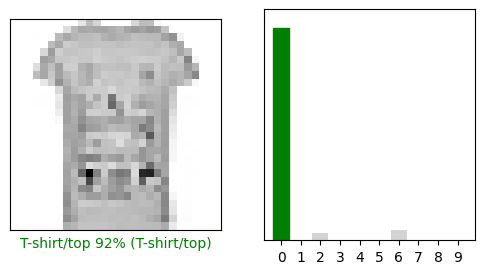

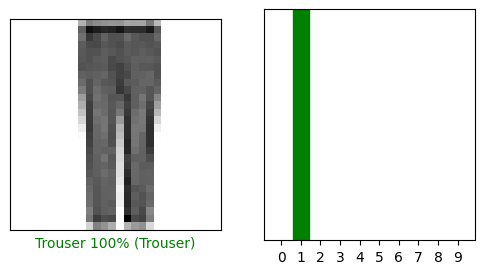

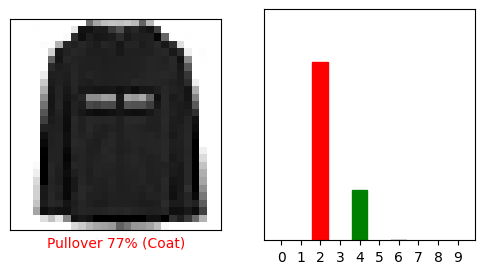

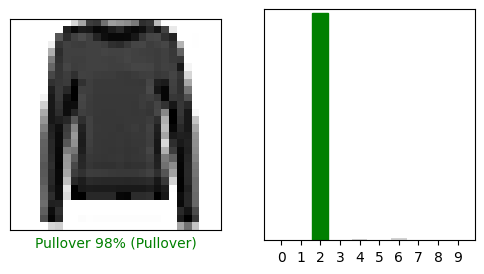

In [ ]:
for i in range(80, 100):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, CNNpredictions[i], test_Y, test_X)
  plt.subplot(1,2,2)
  plot_value_array(i, CNNpredictions[i],  test_Y)
  plt.show()